Exploratory Data Analysis using Pandas, NumPy, Matplotlib & Seaborn libraries for Car tyres available in the Indian market with 11 attributes and 4350 samples and answered the following questions :

1. Which Tyres has the most demand for tube or tubeless?
2. Which are the major brands in the market?
3. Which are the top 10 brands for most tyre models?
4. Which Maruti model has the highest number of tyre models/serial no. and from which tyre brand?
5. Does expensive tyres have higher ratings?
6. What is the Average Selling Price of tyres by its Brand?

**Importing Libraries and Datasets of Car tyres**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/SOUBHIK MANDAL/Desktop/Data Analysis of Tyres of Cars/Car_Tyres_Dataset.csv',thousands=',')
df

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,3255,3255,5.0
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,3406,3406,4.0
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,3490,4319,4.5
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,4484,4244,NaN
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,3025,3025,4.2
...,...,...,...,...,...,...,...,...,...,...,...
4345,Maruti,Swift Deca,VXI,MRF,ZLX,Tubeless,85,165/80 R 14,4038,4038,4.0
4346,Maruti,Swift Deca,VDI,UltraMile,UM 551,Tubeless,85,165/80 R 14,4045,4045,3.0
4347,Maruti,Swift Deca,VXI,UltraMile,UM 551,Tubeless,85,165/80 R 14,4045,4045,3.0
4348,Maruti,Swift Deca,VDI,Yokohama,Earth-1 E400,Tubeless,85,165/80 R 14,3904,3904,3.0


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Load Index,4350.0,84.101609,6.716769,69.0,79.00,86.0,88.0,106.0
Selling Price,4350.0,4724.982989,1848.303937,2248.0,3400.00,4300.0,5594.0,20257.0
Original Price,4350.0,4762.234943,1869.111942,2248.0,3401.25,4319.0,5594.0,20257.0
Rating,2248.0,4.297598,0.698433,1.9,4.00,4.3,5.0,5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           4350 non-null   object 
 1   Model           4350 non-null   object 
 2   Submodel        4350 non-null   object 
 3   Tyre Brand      4350 non-null   object 
 4   Serial No.      4350 non-null   object 
 5   Type            4350 non-null   object 
 6   Load Index      4350 non-null   int64  
 7   Size            4350 non-null   object 
 8   Selling Price   4350 non-null   int64  
 9   Original Price  4350 non-null   int64  
 10  Rating          2248 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 374.0+ KB


In [4]:
print ("Unique values are:\n",df.nunique())

Unique values are:
 Brand               1
Model              34
Submodel          178
Tyre Brand         16
Serial No.        114
Type                2
Load Index         27
Size               47
Selling Price     367
Original Price    371
Rating             22
dtype: int64


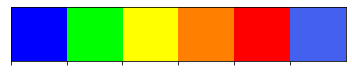

In [5]:
colors = ["#0000FF","#00FF00","#FFFF00","#FF7F00","#FF0000","#4361EE"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =1)
plt.show()

**Demand for Tube or Tubeless tyres**

In [6]:
df['Model'].groupby(df['Type']).count().sort_values(ascending=False)

Type
Tubeless    4061
Tube         289
Name: Model, dtype: int64

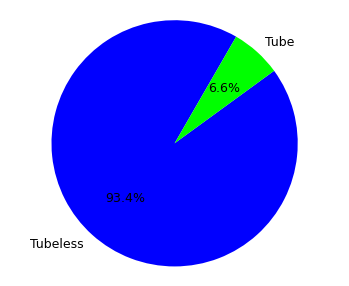

In [7]:
labels = 'Tubeless', 'Tube'
sizes = [4061,289]
fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor('white')
ax.pie(sizes, labels=labels, colors=["#0000FF","#00FF00"],autopct='%1.1f%%',startangle=60,textprops={'color':'black','fontsize':12.5})
ax.axis('equal')
plt.show()

**Major brands in the market**

In [8]:
df['Model'].groupby(df['Tyre Brand']).count().sort_values(ascending=False)

Tyre Brand
BridgeStone    610
GoodYear       501
CEAT           449
JKTyre         445
Apollo         400
Yokohama       379
Continental    339
Falken         269
MRF            263
Firestone      171
UltraMile      149
Michelin       130
Pirelli        104
Hankook         65
Kumho           57
Maxxis          19
Name: Model, dtype: int64

**Which are the top 10 brands with most tyre models**

<AxesSubplot:xlabel='count', ylabel='Tyre Brand'>

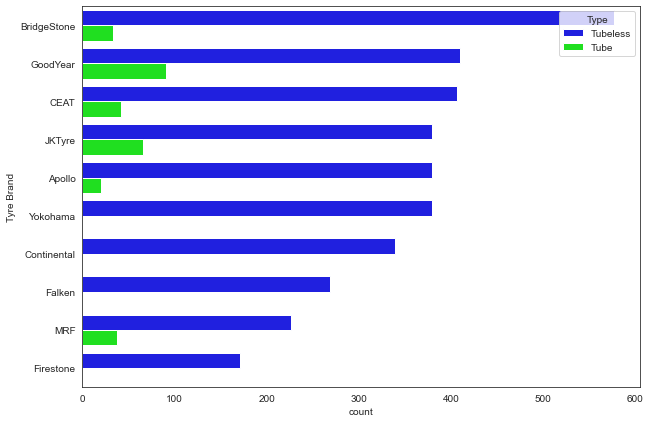

In [9]:
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.countplot(y="Tyre Brand", hue="Type", data=df, palette=["#0000FF","#00FF00"],order=df["Tyre Brand"].value_counts().iloc[:10].index)

**Top 5 Models with most tyre brands**

<AxesSubplot:xlabel='count', ylabel='Model'>

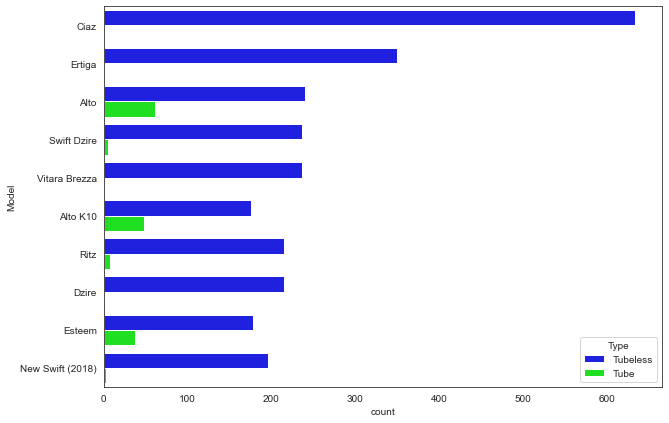

In [10]:
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.countplot(y="Model", hue="Type", data=df, palette=["#0000FF","#00FF00"],order=df["Model"].value_counts().iloc[:10].index)

**Which Maruti model has the highest number of tyre models/serial no**

<AxesSubplot:xlabel='count', ylabel='Model'>

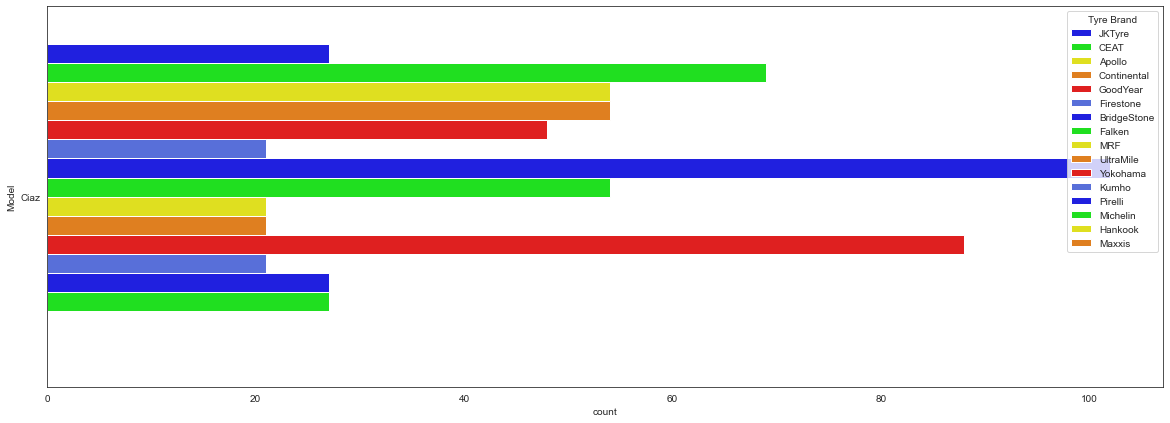

In [11]:
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.countplot(y="Model", hue="Tyre Brand", data=df, palette=colors,order=df["Model"].value_counts().iloc[:1].index)

**Does expensive tyres have higher ratings**

In [12]:
round(df.groupby('Tyre Brand')['Rating'].mean().sort_values(ascending=False),1)

Tyre Brand
Firestone      5.0
Pirelli        4.9
JKTyre         4.5
CEAT           4.4
GoodYear       4.4
Apollo         4.3
Falken         4.3
BridgeStone    4.2
Yokohama       4.2
Michelin       4.1
MRF            4.0
Continental    4.0
UltraMile      3.9
Hankook        NaN
Kumho          NaN
Maxxis         NaN
Name: Rating, dtype: float64

In [13]:
df_p=df[(df["Rating"]>= 4.0) & (df["Selling Price"]>= 5000)]
df_p.iloc[:5]

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
33,Maruti,Swift Dzire,ZDI (Diesel),Apollo,Amazer 4G Life,Tubeless,88,185/70 R 15,5429,5429,4.0
34,Maruti,Swift Dzire,ZDI (Diesel),Apollo,Ainac 4G,Tubeless,88,185/70 R 16,5359,5359,5.0
42,Maruti,Swift Dzire,ZDI (Diesel),Apollo,Ainac 4G,Tubeless,88,185/70 R 24,5359,5359,5.0
43,Maruti,Swift Dzire,ZDI (Diesel),Apollo,Amazer 4G Life,Tubeless,88,185/70 R 25,5429,5429,4.0
46,Maruti,Swift Dzire,ZDI (Petrol) New,Apollo,Ainac 4G,Tubeless,88,185/70 R 28,5359,5359,5.0


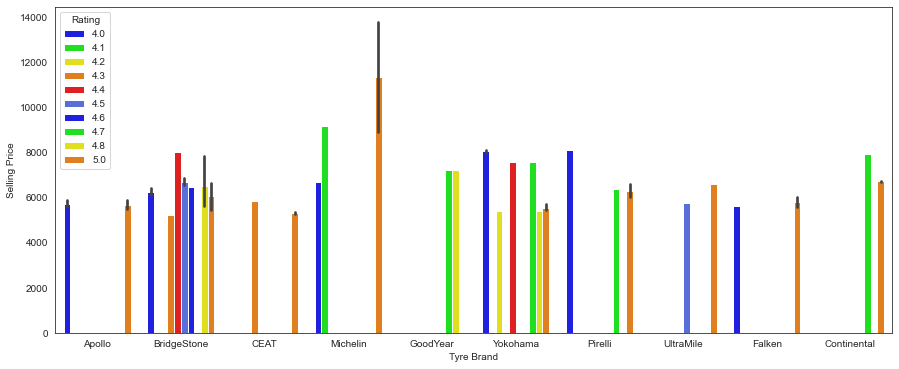

In [14]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(y='Selling Price', x='Tyre Brand', data=df_p, hue='Rating',palette=colors)

**Average Selling Price of tyres by its Brand**

In [15]:
df.groupby('Tyre Brand')['Selling Price'].mean().sort_values(ascending=False).apply(np.ceil)

Tyre Brand
Pirelli        7359.0
Michelin       6893.0
Maxxis         6232.0
Yokohama       6120.0
Continental    5250.0
BridgeStone    5190.0
Falken         5066.0
Hankook        4980.0
Kumho          4650.0
Apollo         4631.0
UltraMile      4475.0
CEAT           4130.0
GoodYear       4011.0
MRF            3718.0
JKTyre         3602.0
Firestone      3484.0
Name: Selling Price, dtype: float64

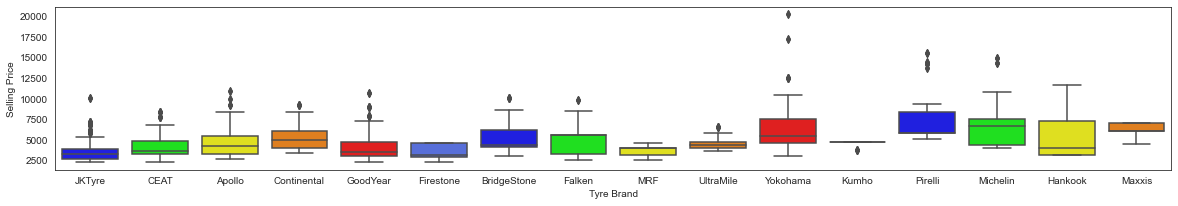

In [16]:
fig, ax = plt.subplots(figsize=(20,3))
ax = sns.boxplot(x="Tyre Brand", y="Selling Price", data=df, palette=colors)

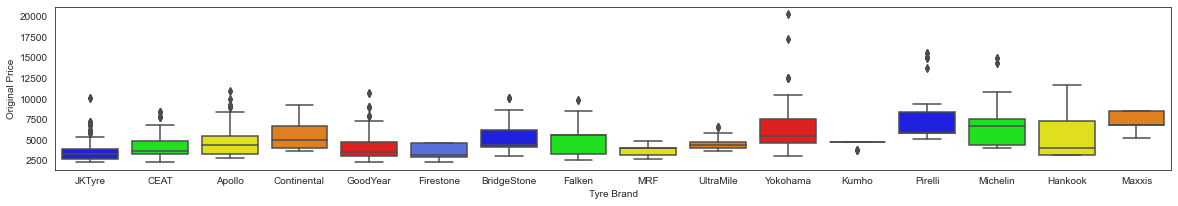

In [17]:
fig, ax = plt.subplots(figsize=(20,3))
ax = sns.boxplot(x="Tyre Brand", y="Original Price", data=df, palette=colors)